In [2]:
'''
#Multifunctionality Experiment 1
where='Home'

if where=='Work':
    prepath='/Users/Ryan Clark/Box/ResearchVenturelli/'
else:
    prepath='/Users/Ryan/Box/ResearchVenturelli/'
'''
#Import the necessary packages
import sys
sys.path.append('.')
import RLC_data_processing as rc
from metadata_2019_06_17 import *
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy import stats
import pickle as pkl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
mpl.rcParams['figure.dpi']=200

import warnings
warnings.filterwarnings('ignore')

seqDF=pd.read_csv('data/2020_12_16_MiSeq047_tallyfile_plate_row_column_annotated.csv',index_col=0)

In [3]:
namedict={
   'BA': 'Bifidobacterium_adolescentis_ATCC_15703_NC_008618',
   'CA': 'Collinsella_aerofaciens_ATCC_25986',
   'BT': 'Bacteroides_thetaiotaomicron_VPI-5482_NC_004663',
   'BU': 'Bacteroides_uniformis_ATCC_8492',
   'PC': 'Prevotella_copri_DSM_18205',
   'AC': 'Anaerostipes_caccae_DSM_14662_4',
   'BH': 'Blautia_hydrogenotrophica_DSM_10507',
   'CC': 'Coprococcus_comes_1.0.1_Cont2276_NZ_ABVR01000038',
   'CG': 'Clostridium_asparagiforme_DSM_15981_C_asparagiforme_1.0_Cont7.2_NZ_ACCJ01000522',
   'ER': 'Eubacterium_rectale_ATCC_33656_NC_012781',
   'DP': 'Desulfovibrio_piger_ATCC_29098',
   'EL': 'Eggerthella_lenta_DSM_2243_NC_013204',
   'BY': 'Bacteroides_cellulosilyticus_DSM_14838_1.0_Cont4.1_NZ_ACCH01000108',
   'BF': 'Bacteroides_fragilis_NCTC_9343',
   'CD': 'Clostridioides_difficile',
   'RI': 'Roseburia_intestinalis_L1_82',
   'BP': 'Bifidobacterium_pseudocatenulatum_DSM20438',
   'BV': 'Bacteroides_vulgatus_ATCC_8482_NC_009614',
   'CH': 'Clostridium_hiranonis_DSM_13275',
   'DF': 'Dorea_formicigenerans_ATCC_27755',
   'CS': 'Clostridium_scindens_ATCC_35704',
   'PJ': 'Parabacteroides_johnsonii_DSM_18315_NZ_ABYH01000014',
   'FP': 'Faecalibacterium_prausnitzii_A2_165_NZ',
   'EC': 'Escherichia_coli',
   'BC': 'Bacteroides_caccae_ATCC_43185',
   'HB': 'Holdemanella_biformis_DSM_3989',
   'BO': 'Bacteroides_ovatus_ATCC_8483',
   'DL': 'Dorea_longicatena_DSM_13814',
   'BL': 'Bifidobacterium_longum_subsp_infantis',
   'B.cereus':'Bacillus_cereus'
   }

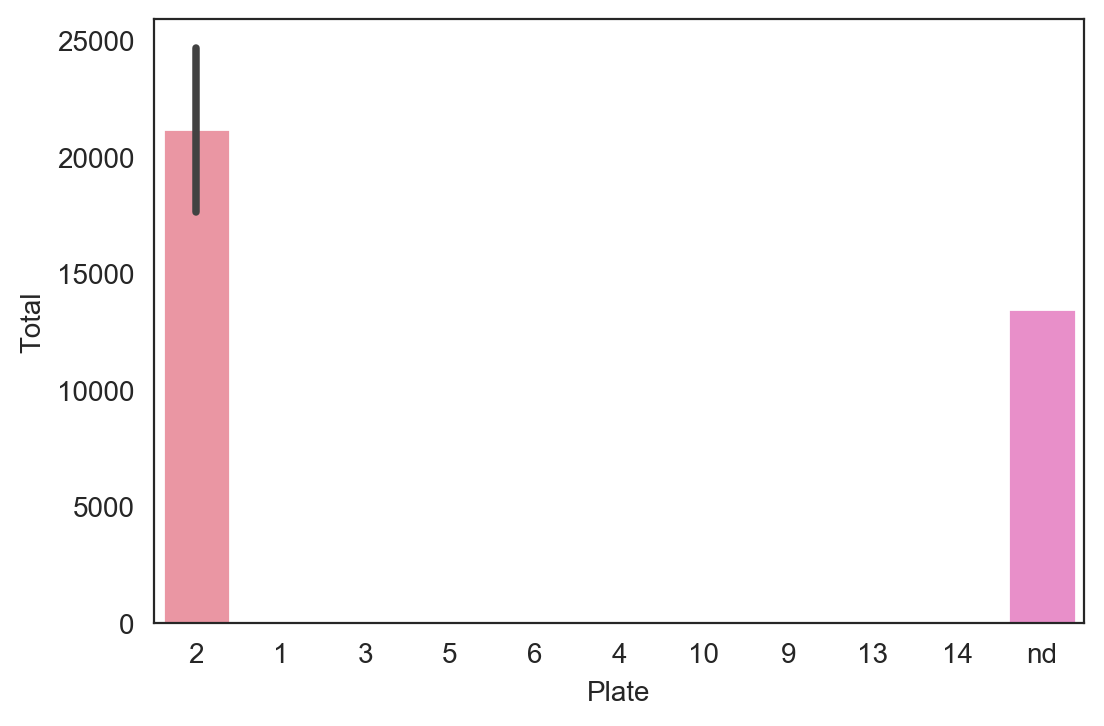

In [4]:
sns.barplot(x='Plate',y='Total',data=seqDF)
plt.show()
plt.close()

In [7]:
#Do the necessary calculations from the tallyfile
# divid reads by total reads
plates=['2']

plateDFdict={}

for plate in plates:
    plateDFdict[plate]=seqDF[seqDF['Plate']==plate]

cutoff=0
for plate in plates:
    DF=plateDFdict[plate]
    for z in list(DF.index.values):
        total=0
        for species in list(namedict):
            #calculate total reads for species above a cutoff
            if DF.at[z,namedict[species]]>cutoff:
                total+=DF.at[z,namedict[species]]
        for species in list(namedict):
            string=species+' Fraction'
            if DF.at[z,namedict[species]]>cutoff:
                DF.at[z,string]=DF.at[z,namedict[species]]/total
            else:
                DF.at[z,string]=0
    plateDFdict[plate]=DF

DF=plateDFdict['2']
DF=DF[DF['Type']==DF['Type']]
plateDFdict['2']=DF

PC
BF
FP
ER
RI
DL
DF


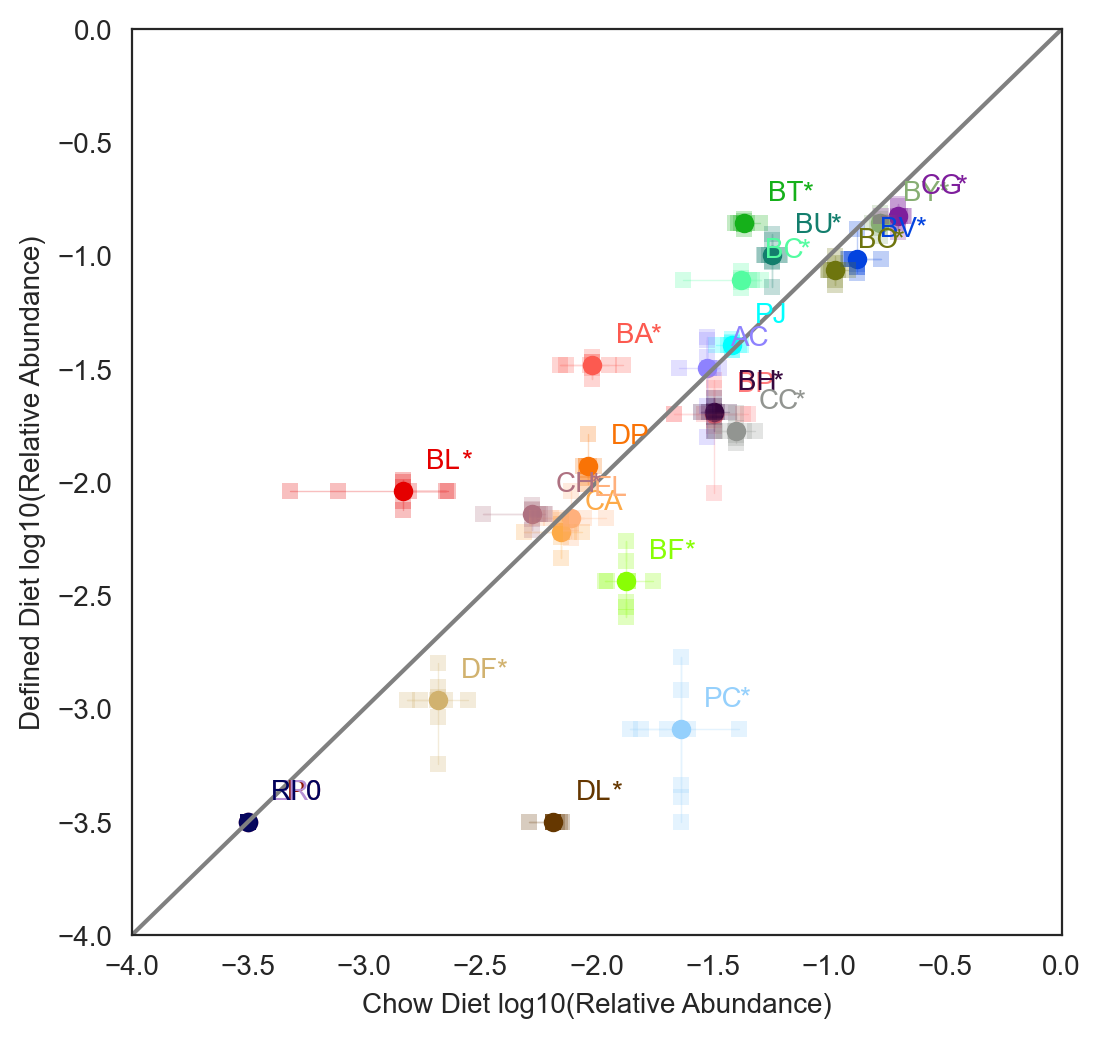

In [5]:
# compare two diets log scale
mouseDF=plateDFdict['2']
ld=10**-3.5
plt.figure(figsize=(6,6))
chowDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Chow')]
definedDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Defined')]
for species in phylogeny:
    xlist=chowDF[species+' Fraction']
    ylist=definedDF[species+' Fraction']
    T,p=stats.ttest_ind(xlist,ylist,equal_var=False)
    xlist[xlist<ld]=ld
    ylist[ylist<ld]=ld
    plt.scatter(np.log10(np.mean(xlist)),np.log10(np.mean(ylist)),color=colordict[species])
    plt.plot([np.log10(np.mean(xlist)) for i in range(len(list(ylist)))],np.log10(ylist),marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
    plt.plot(np.log10(xlist),[np.log10(np.mean(ylist)) for i in range(len(list(xlist)))],marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
    plt.text(np.log10(np.mean(xlist))+0.1,np.log10(np.mean(ylist))+0.1,species,color=colordict[species])
    if p<0.05:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'*',color=colordict[species])
    elif np.mean(xlist)==ld and np.mean(ylist)==ld:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'0',color=colordict[species])
    if np.mean(ylist)<0.005:
        print(species)
plt.xlim(-4,0)
plt.ylim(-4,0)
plt.plot([-4,0],[-4,0],color='grey')
plt.xlabel('Chow Diet log10(Relative Abundance)')
plt.ylabel('Defined Diet log10(Relative Abundance)')
plt.show()
plt.close()

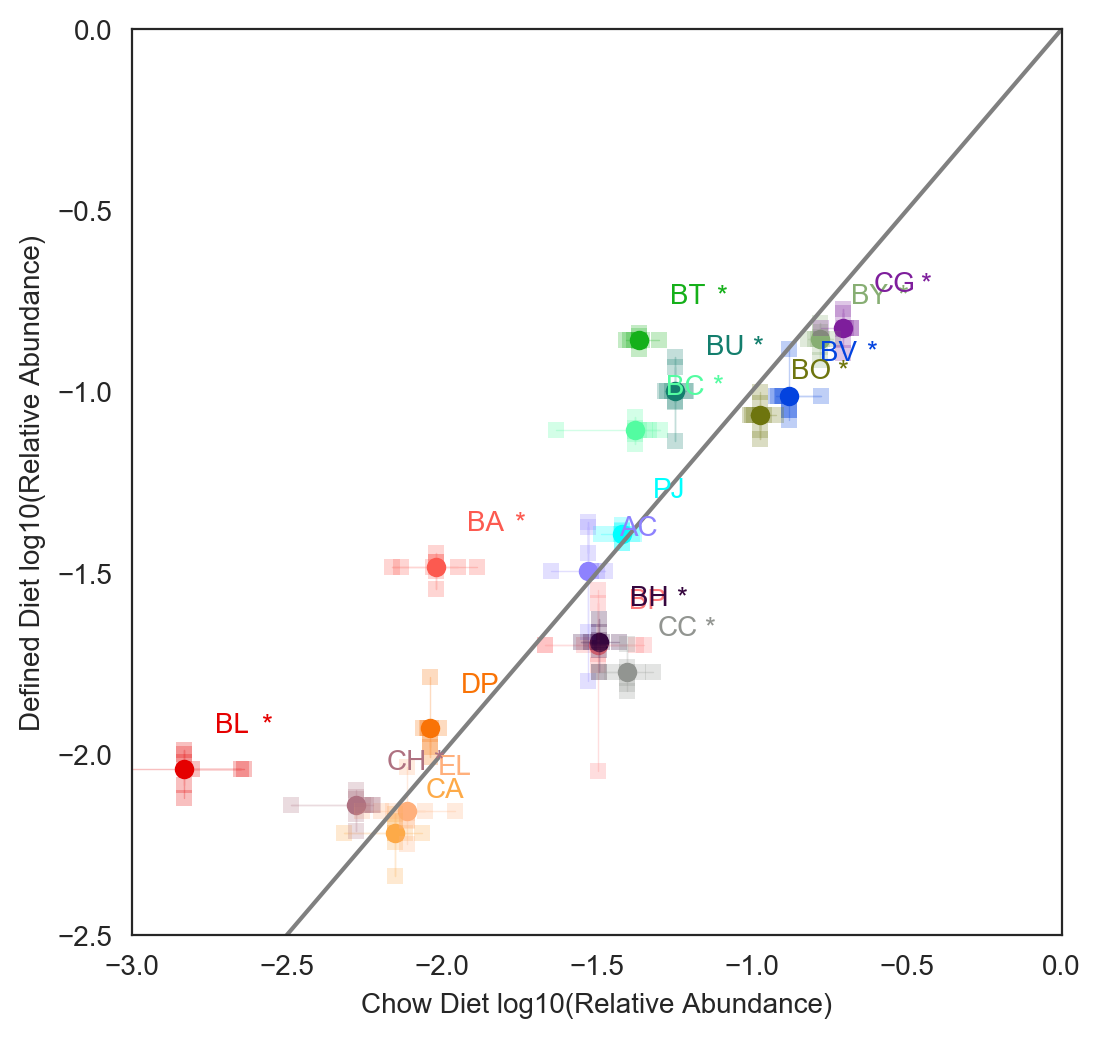

In [9]:
# log scale-zoomed in
mouseDF=plateDFdict['2']
ld=10**-3.5
plt.figure(figsize=(6,6))
chowDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Chow')]
definedDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Defined')]
for species in phylogeny:
    if species not in ['PC','BF','FP','ER','RI','DL','DF']:
        xlist=chowDF[species+' Fraction']
        ylist=definedDF[species+' Fraction']
        T,p=stats.ttest_ind(xlist,ylist,equal_var=False)
        xlist[xlist<ld]=ld
        ylist[ylist<ld]=ld
        plt.scatter(np.log10(np.mean(xlist)),np.log10(np.mean(ylist)),color=colordict[species])
        plt.plot([np.log10(np.mean(xlist)) for i in range(len(list(ylist)))],np.log10(ylist),marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
        plt.plot(np.log10(xlist),[np.log10(np.mean(ylist)) for i in range(len(list(xlist)))],marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
        plt.text(np.log10(np.mean(xlist))+0.1,np.log10(np.mean(ylist))+0.1,species,color=colordict[species])
        if p<0.05:
            plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'*',color=colordict[species])
        elif np.mean(xlist)==ld and np.mean(ylist)==ld:
            plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'0',color=colordict[species])
        if np.mean(ylist)<0.005:
            print(species)
plt.xlim(-3,0)
plt.ylim(-2.5,0)
plt.plot([-4,0],[-4,0],color='grey')
plt.xlabel('Chow Diet log10(Relative Abundance)')
plt.ylabel('Defined Diet log10(Relative Abundance)')
plt.show()
plt.close()

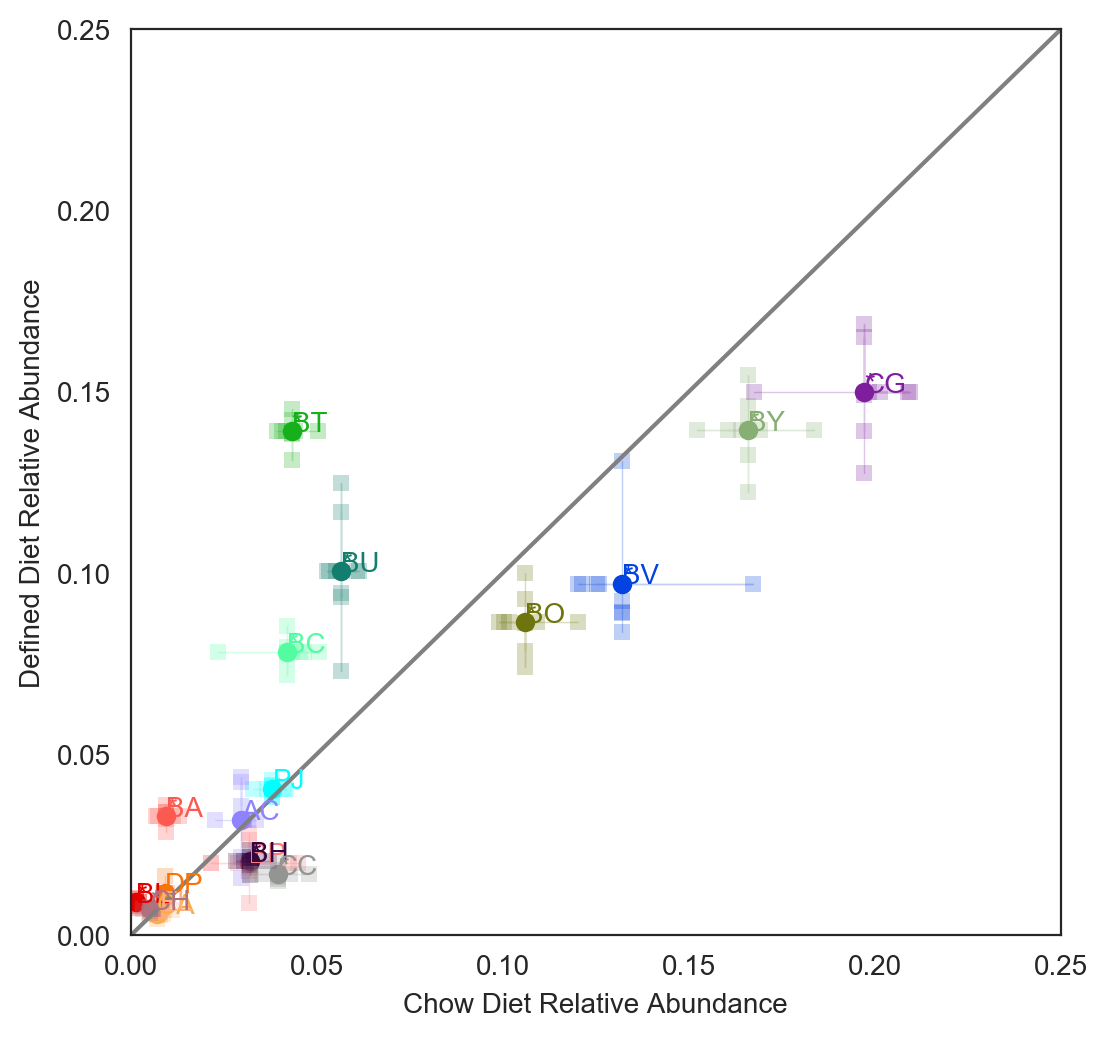

In [10]:
# linear scale
mouseDF=plateDFdict['2']
ld=10**-3.5
plt.figure(figsize=(6,6))
chowDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Chow')]
definedDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Defined')]
for species in phylogeny:
    if species not in ['PC','BF','FP','ER','RI','DL','DF']:
        xlist=chowDF[species+' Fraction']
        ylist=definedDF[species+' Fraction']
        T,p=stats.ttest_ind(xlist,ylist,equal_var=False)
        xlist[xlist<ld]=ld
        ylist[ylist<ld]=ld
        plt.scatter(np.mean(xlist),np.mean(ylist),color=colordict[species])
        plt.plot([np.mean(xlist) for i in range(len(list(ylist)))],ylist,marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
        plt.plot(xlist,[np.mean(ylist) for i in range(len(list(xlist)))],marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
        plt.text(np.mean(xlist),np.mean(ylist),species,color=colordict[species])
        if p<0.05:
            plt.text(np.mean(xlist),np.mean(ylist),'*',color=colordict[species])
plt.xlim(0,0.25)
plt.ylim(0,0.25)
plt.plot([0,1],[0,1],color='grey')
plt.xlabel('Chow Diet Relative Abundance')
plt.ylabel('Defined Diet Relative Abundance')
plt.show()
plt.close()

## For both diets, abundances are consistent between cecal samples and fecal samples from the same mice taken at time of sacrifice. There are small differences for CC and BH in the Defined Diet # template conclusion

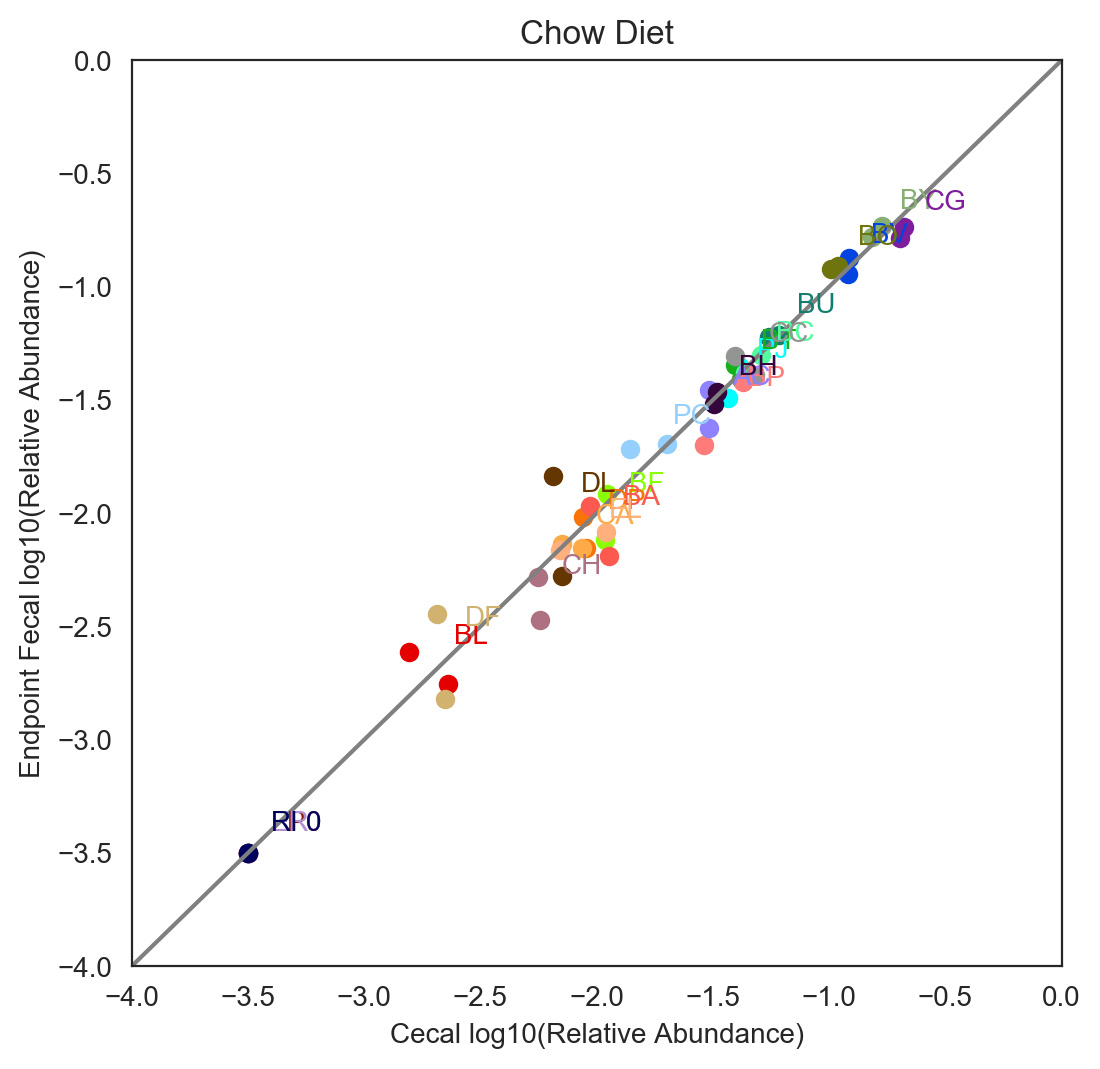

In [11]:
# whether cecal ~ fecal samples
mouseDF=plateDFdict['2']
ld=10**-3.5
plt.figure(figsize=(6,6))
cecalDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Chow')&(mouseDF.Mouse.isin(['1','2']))]
fecalDF=mouseDF[(mouseDF['Type']=='Fecal End')&(mouseDF['Diet']=='Chow')&(mouseDF.Mouse.isin(['1','2']))]
for species in phylogeny:
    xlist=cecalDF[species+' Fraction']
    ylist=fecalDF[species+' Fraction']
    T,p=stats.ttest_ind(xlist,ylist,equal_var=False)
    xlist[xlist<ld]=ld
    ylist[ylist<ld]=ld
    plt.scatter(np.log10(xlist),np.log10(ylist),color=colordict[species])
    plt.text(np.log10(np.mean(xlist))+0.1,np.log10(np.mean(ylist))+0.1,species,color=colordict[species])
    if p<0.05:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'*',color=colordict[species])
        print(species)
    elif np.mean(xlist)==ld and np.mean(ylist)==ld:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'0',color=colordict[species])
plt.xlim(-4,0)
plt.ylim(-4,0)
plt.plot([-4,0],[-4,0],color='grey')
plt.title('Chow Diet')
plt.xlabel('Cecal log10(Relative Abundance)')
plt.ylabel('Endpoint Fecal log10(Relative Abundance)')
plt.show()
plt.close()

BH: p=0.03324466953718665, Cecal/Fecal=0.8085883192842426
CC: p=0.015435638630992725, Cecal/Fecal=0.6184890656088712


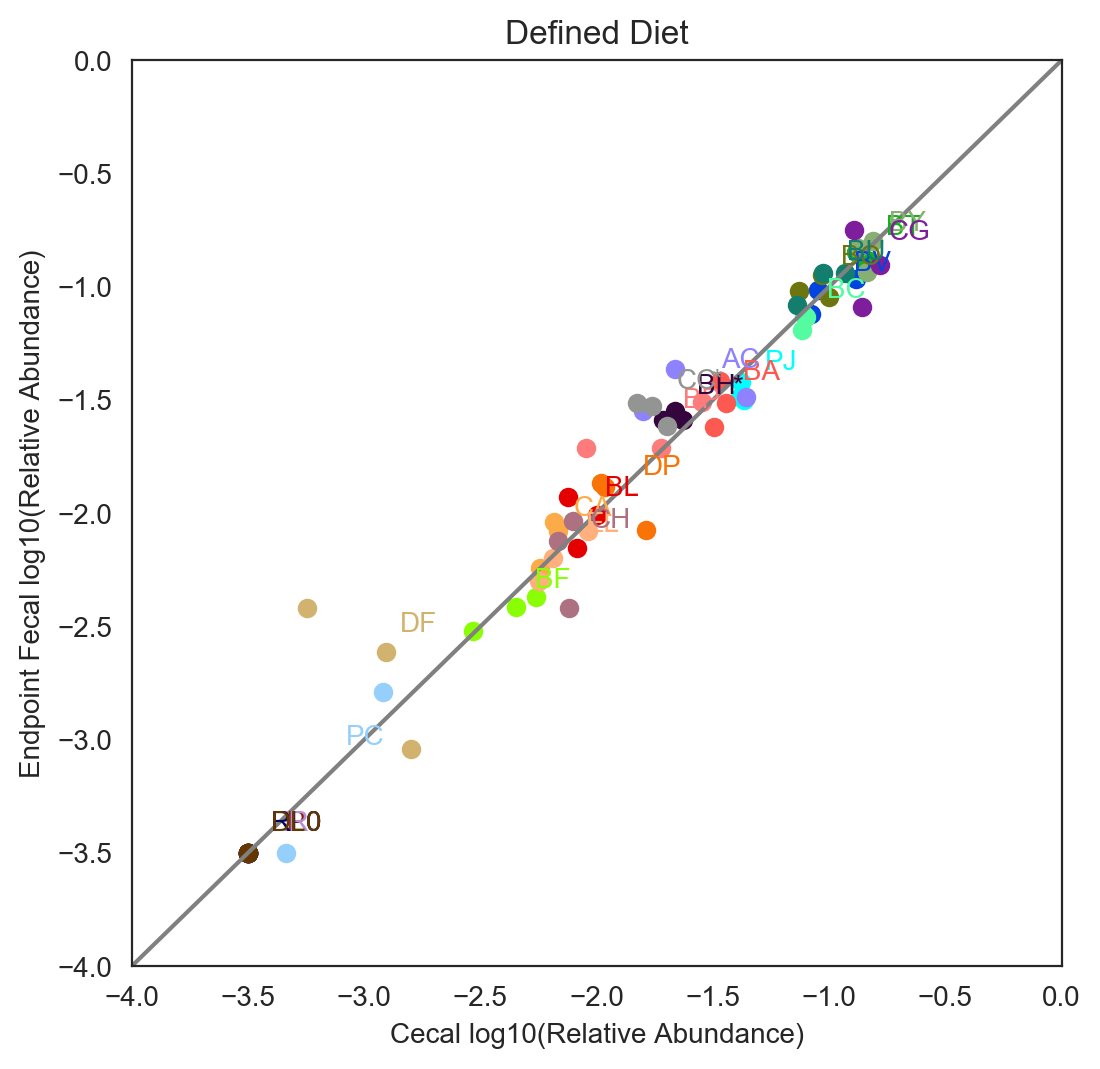

In [13]:
mouseDF=plateDFdict['2']
ld=10**-3.5
plt.figure(figsize=(6,6))
cecalDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Defined')&(mouseDF.Mouse.isin(['1','2','5']))]
fecalDF=mouseDF[(mouseDF['Type']=='Fecal End')&(mouseDF['Diet']=='Defined')&(mouseDF.Mouse.isin(['1','2','5']))]
for species in phylogeny:
    xlist=cecalDF[species+' Fraction']
    ylist=fecalDF[species+' Fraction']
    T,p=stats.ttest_ind(xlist,ylist,equal_var=False)
    xlist[xlist<ld]=ld
    ylist[ylist<ld]=ld
    plt.scatter(np.log10(xlist),np.log10(ylist),color=colordict[species])
    plt.text(np.log10(np.mean(xlist))+0.1,np.log10(np.mean(ylist))+0.1,species,color=colordict[species])
    if p<0.05:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'*',color=colordict[species])
        print(species+': p='+str(p)+', Cecal/Fecal='+str(np.mean(xlist)/np.mean(ylist)))
    elif np.mean(xlist)==ld and np.mean(ylist)==ld:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'0',color=colordict[species])
plt.xlim(-4,0)
plt.ylim(-4,0)
plt.plot([-4,0],[-4,0],color='grey')
plt.title('Defined Diet')
plt.xlabel('Cecal log10(Relative Abundance)')
plt.ylabel('Endpoint Fecal log10(Relative Abundance)')
plt.show()
plt.close()

## Examine community assembly by looking at community composition over time

In [16]:
#Load data from sequencing inoculum for mouse experiment
#MiSeqOSV039 Plate 24 Well A12
newseqDF=pd.read_csv('data/2020_12_07_MiSeqOSV039_tallyfile_platerowcolumn.csv',index_col=0)
#Do the necessary calculations from the tallyfile
plates=[24,5]

for plate in plates:
    plateDFdict[plate]=newseqDF[newseqDF['Plate']==plate]

cutoff=0
for plate in plates:
    DF=plateDFdict[plate]
    for z in list(DF.index.values):
        total=0
        for species in list(namedict):
            #calculate total reads for species above a cutoff
            if DF.at[z,namedict[species]]>cutoff:
                total+=DF.at[z,namedict[species]]
        for species in list(namedict):
            string=species+' Fraction'
            if DF.at[z,namedict[species]]>cutoff:
                DF.at[z,string]=DF.at[z,namedict[species]]/total
            else:
                DF.at[z,string]=0
    plateDFdict[plate]=DF

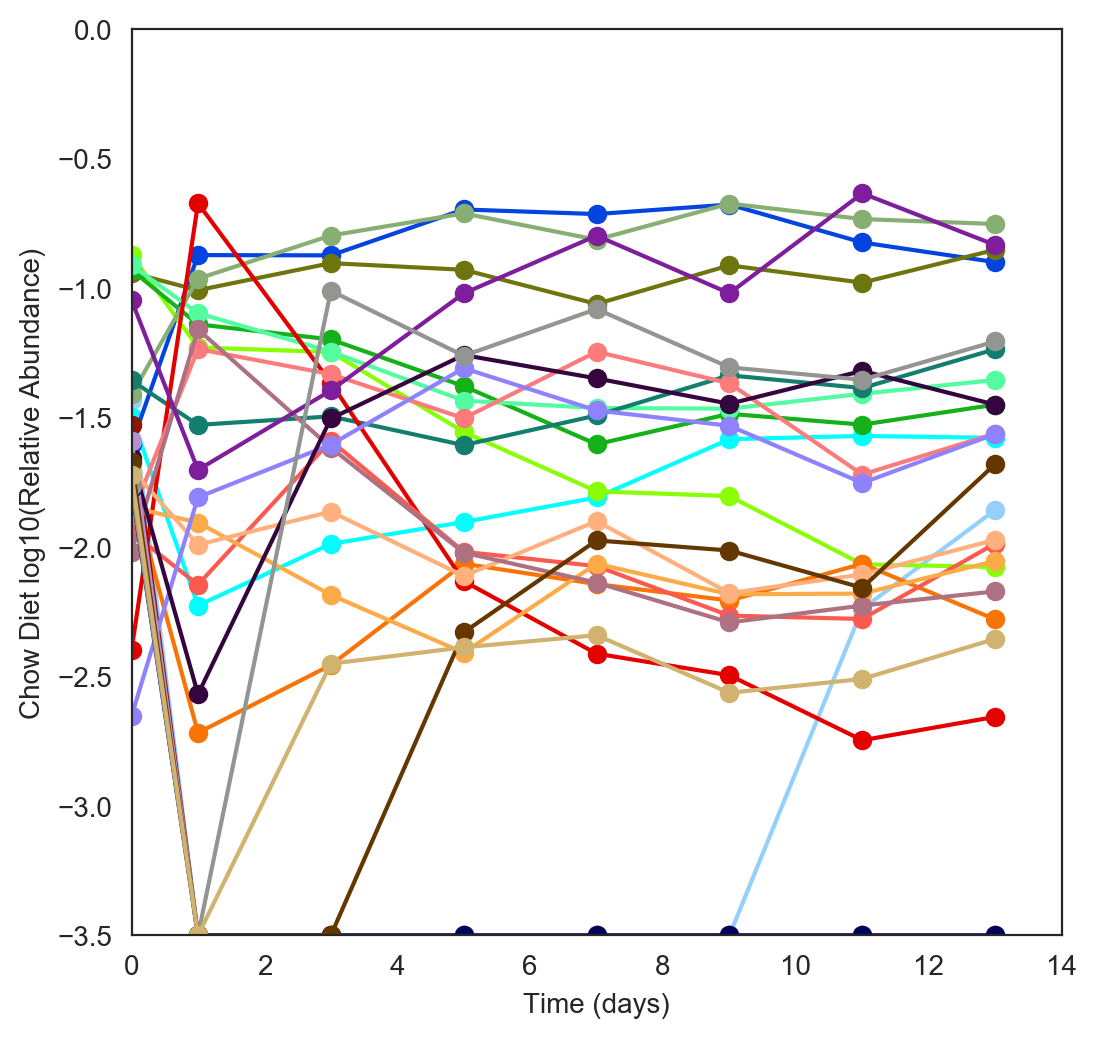

In [17]:
mouseDF=plateDFdict['2']
time0DF=plateDFdict[24]
ld=10**-3.5
plt.figure(figsize=(6,6))
chowDF=mouseDF[(mouseDF['Type']=='Fecal')&(mouseDF['Diet']=='Chow')]
for species in phylogeny:
    x=chowDF['Time']
    y=chowDF[species+' Fraction']
    y[y<ld]=ld
    x=[0]+list(x)
    value=time0DF[(time0DF['Row']=='A')&(time0DF['Column']==12)][species+' Fraction'].mean()
    y=[value]+list(y)
    plt.plot(x,np.log10(y),color=colordict[species],marker='o')
plt.xlim(0,14)
plt.ylim(-3.5,0)
plt.xlabel('Time (days)')
plt.ylabel('Chow Diet log10(Relative Abundance)')
plt.show()
plt.close()

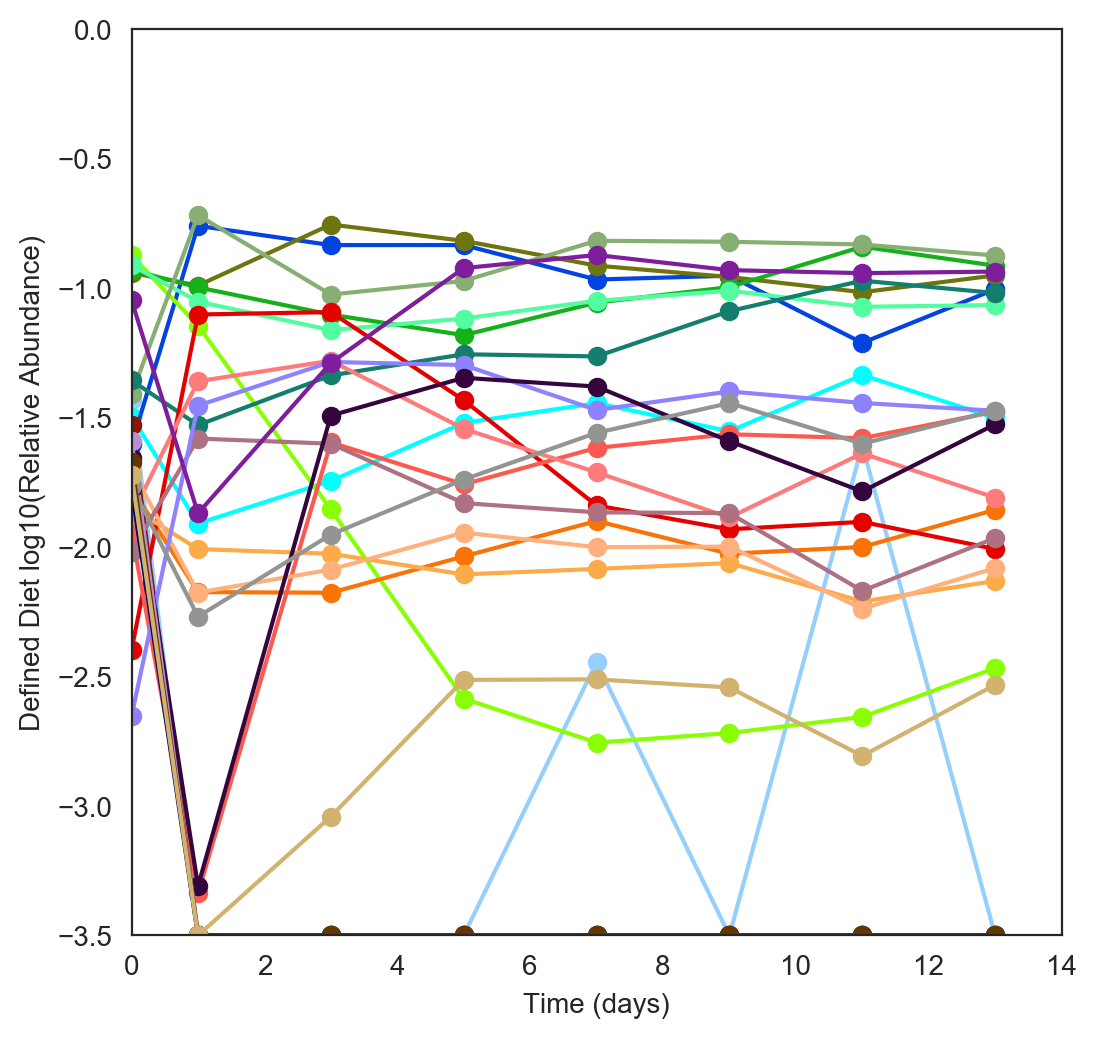

In [18]:
mouseDF=plateDFdict['2']
ld=10**-3.5
plt.figure(figsize=(6,6))
tempDF=mouseDF[(mouseDF['Type']=='Fecal')&(mouseDF['Diet']=='Defined')]
for species in phylogeny:
    x=tempDF['Time']
    y=tempDF[species+' Fraction']
    y[y<ld]=ld
    x=[0]+list(x)
    value=time0DF[(time0DF['Row']=='A')&(time0DF['Column']==12)][species+' Fraction'].mean()
    y=[value]+list(y)
    plt.plot(x,np.log10(y),color=colordict[species],marker='o')
plt.xlim(0,14)
plt.ylim(-3.5,0)
plt.xlabel('Time (days)')
plt.ylabel('Defined Diet log10(Relative Abundance)')
plt.show()
plt.close()

In [20]:
masterDF=pd.read_csv('data/2020_02_28_MasterDF.csv',index_col=0)

In [21]:
tempDF=masterDF[masterDF['Treatment']=='COMM6']

DP
BL
EL
FP
BH
RI


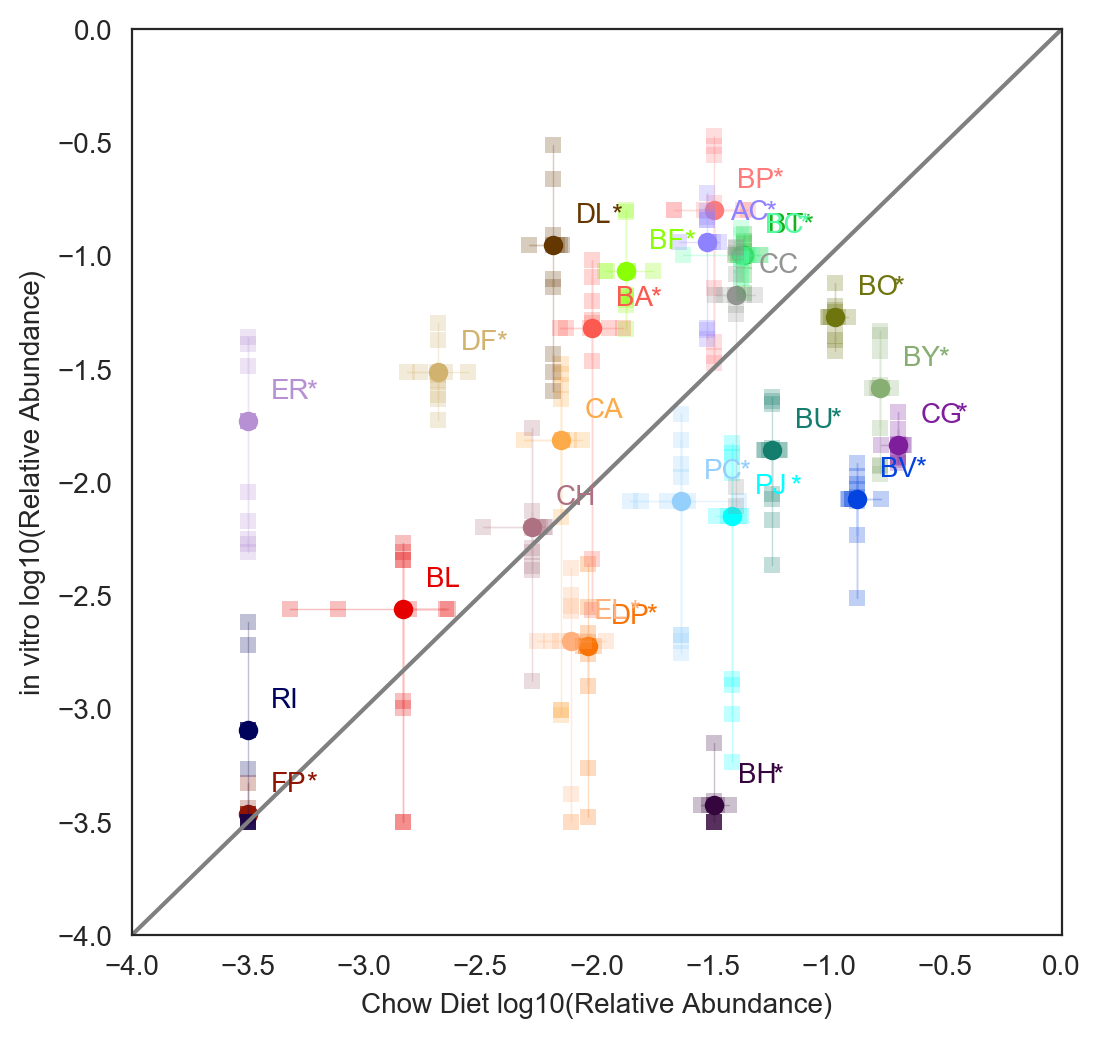

In [22]:
mouseDF=plateDFdict['2']
ld=10**-3.5
plt.figure(figsize=(6,6))
chowDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Chow')]
invitroDF=masterDF[(masterDF['Treatment']=='COMM6')&(masterDF['Total']>1000)]
for species in phylogeny:
    xlist=chowDF[species+' Fraction']
    ylist=invitroDF[species+' Fraction']
    T,p=stats.ttest_ind(xlist,ylist,equal_var=False)
    xlist[xlist<ld]=ld
    ylist[ylist<ld]=ld
    plt.scatter(np.log10(np.mean(xlist)),np.log10(np.mean(ylist)),color=colordict[species])
    plt.plot([np.log10(np.mean(xlist)) for i in range(len(list(ylist)))],np.log10(ylist),marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
    plt.plot(np.log10(xlist),[np.log10(np.mean(ylist)) for i in range(len(list(xlist)))],marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
    plt.text(np.log10(np.mean(xlist))+0.1,np.log10(np.mean(ylist))+0.1,species,color=colordict[species])
    if p<0.05:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'*',color=colordict[species])
    elif np.mean(xlist)==ld and np.mean(ylist)==ld:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'0',color=colordict[species])
    if np.mean(ylist)<0.005:
        print(species)
plt.xlim(-4,0)
plt.ylim(-4,0)
plt.plot([-4,0],[-4,0],color='grey')
plt.xlabel('Chow Diet log10(Relative Abundance)')
plt.ylabel('in vitro log10(Relative Abundance)')
plt.savefig('ChowDietvsinvitro.pdf')
plt.show()
plt.close()

In [23]:
masterDF[masterDF['Treatment']=='COMM6']

,Treatment,Rep,OD,Acetate,Butyrate,Lactate,Succinate,ER,FP,AC,...,Total,Unclassified,Contamination?,Experiment No.,Sequenced,Peak30,Peak32,Peak35,Peak41,pH
366,COMM6,0.0,2.5010,44.5201,5.5110,55.9435,10.2271,1.0,1.0,1.0,...,7204.0,106.0,No,6.0,MiSeqOSV004,NaN,NaN,NaN,NaN,NaN
367,COMM6,1.0,2.1330,47.0369,6.6128,51.9133,11.0955,1.0,1.0,1.0,...,13.0,0.0,LowReads,6.0,MiSeqOSV004,NaN,NaN,NaN,NaN,NaN
368,COMM6,2.0,2.4960,52.9674,6.7143,56.1000,11.8639,1.0,1.0,1.0,...,4279.0,15.0,No,6.0,MiSeqOSV004,NaN,NaN,NaN,NaN,NaN
369,COMM6,3.0,1.5830,51.5459,8.5000,57.9640,11.0472,1.0,1.0,1.0,...,5148.0,66.0,No,6.0,MiSeqOSV004,NaN,NaN,NaN,NaN,NaN
1042,COMM6,0.0,2.2146,29.2543,18.0829,37.0035,18.6886,1.0,1.0,1.0,...,9698.0,186.0,No,10.0,MiSeqOSV007,NaN,NaN,NaN,NaN,NaN
1229,COMM6,1.0,2.2146,26.6842,19.0283,25.8461,22.1978,1.0,1.0,1.0,...,15827.0,333.0,No,10.0,MiSeqOSV007,NaN,NaN,NaN,NaN,NaN
1367,COMM6,0.0,2.4195,43.3500,15.0400,48.1000,9.4200,1.0,1.0,1.0,...,5588.0,62.0,No,11.0,MiSeqOSV014,0.0000,108.1278,27.5211,12.6464,2.961250
1462,COMM6,1.0,2.2105,29.6900,20.4700,28.3600,13.1900,1.0,1.0,1.0,...,12.0,0.0,LowReads,11.0,MiSeqOSV014,4.2547,110.0995,25.8387,23.8652,4.648781
1742,COMM6,0.0,2.3330,38.2448,25.3997,35.0199,17.1612,1.0,1.0,1.0,...,10994.0,34.0,No,13.0,MiSeqOSV020,2.2249,133.1021,23.6399,22.4217,4.736153
1837,COMM6,1.0,2.0910,35.6483,26.7691,30.2518,14.1765,1.0,1.0,1.0,...,12060.0,55.0,No,13.0,MiSeqOSV020,4.0024,133.7671,34.5138,23.0025,4.862992


DP
BL
EL
FP
BH
RI


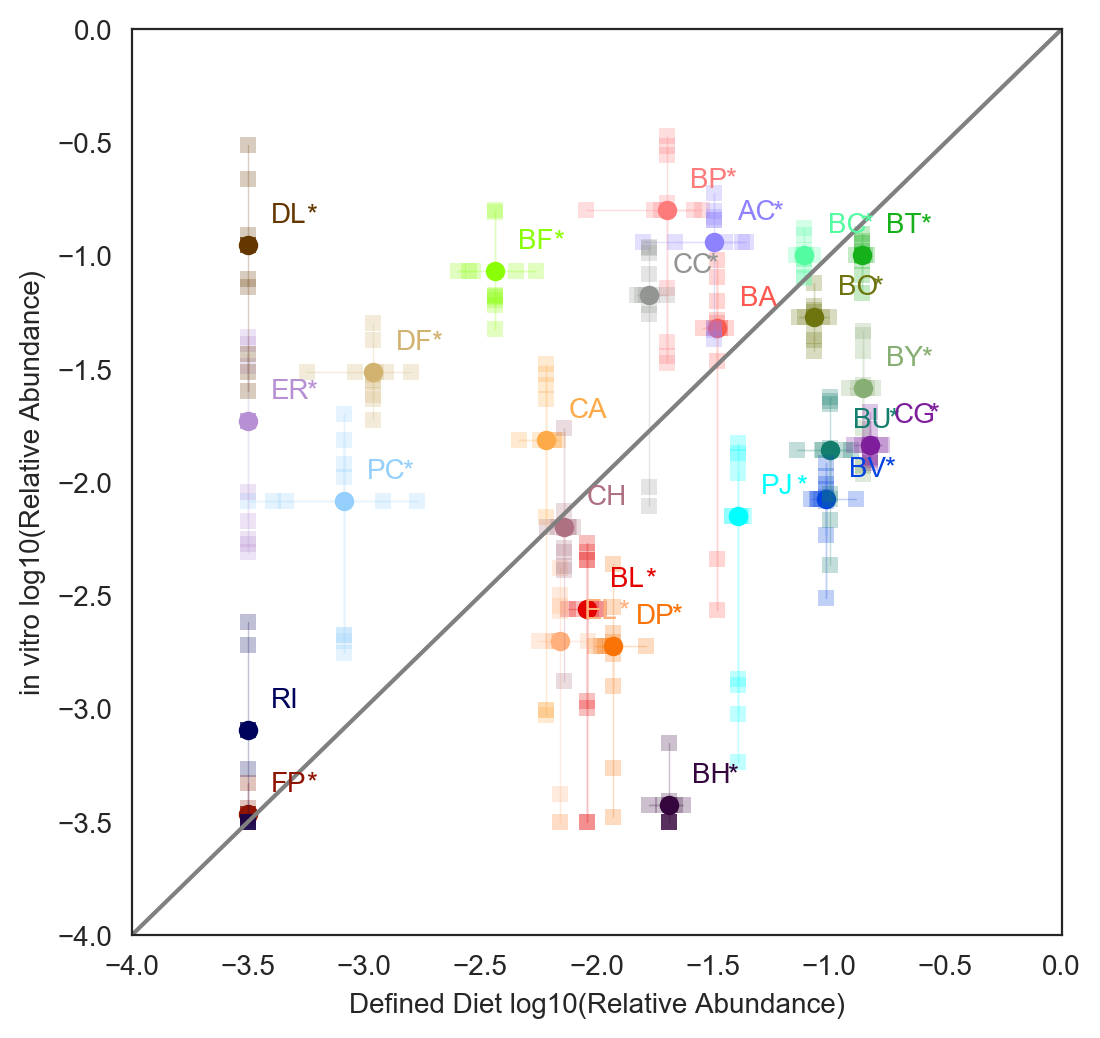

In [25]:
mouseDF=plateDFdict['2']
ld=10**-3.5
plt.figure(figsize=(6,6))
invitroDF=masterDF[(masterDF['Treatment']=='COMM6')&(masterDF['Total']>1000)]
definedDF=mouseDF[(mouseDF['Type']=='Cecal')&(mouseDF['Diet']=='Defined')]
for species in phylogeny:
    xlist=definedDF[species+' Fraction']
    ylist=invitroDF[species+' Fraction']
    T,p=stats.ttest_ind(xlist,ylist,equal_var=False)
    xlist[xlist<ld]=ld
    ylist[ylist<ld]=ld
    plt.scatter(np.log10(np.mean(xlist)),np.log10(np.mean(ylist)),color=colordict[species])
    plt.plot([np.log10(np.mean(xlist)) for i in range(len(list(ylist)))],np.log10(ylist),marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
    plt.plot(np.log10(xlist),[np.log10(np.mean(ylist)) for i in range(len(list(xlist)))],marker='s',alpha=0.25,linewidth=0.5,color=colordict[species],markeredgewidth=0)
    plt.text(np.log10(np.mean(xlist))+0.1,np.log10(np.mean(ylist))+0.1,species,color=colordict[species])
    if p<0.05:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'*',color=colordict[species])
    elif np.mean(xlist)==ld and np.mean(ylist)==ld:
        plt.text(np.log10(np.mean(xlist))+0.25,np.log10(np.mean(ylist))+0.1,'0',color=colordict[species])
    if np.mean(ylist)<0.005:
        print(species)
plt.xlim(-4,0)
plt.ylim(-4,0)
plt.plot([-4,0],[-4,0],color='grey')
plt.xlabel('Defined Diet log10(Relative Abundance)')
plt.ylabel('in vitro log10(Relative Abundance)')
plt.savefig('DefinedDietvsinvitro.pdf')
plt.show()
plt.close()